# BY: Mohamed Ashraf Gaber

## The Battle of Neighborhoods.

## Importing Libraries I'll use.

In [1]:
import numpy as np
import pandas as pd
import bs4
import requests
from lxml import html
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans  # Importing KMeans (The model I will use)
import folium # map rendering library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

## Setting the url and make request to the url

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

result = requests.get(url)

## Making a BeautifulSoup Object with the the content (HTML) of the page.
## Getting only the first table in the page.
## Reading it using Pandas.

In [3]:
soup = bs4.BeautifulSoup(result.content, 'lxml')

first_table = soup.find_all('table')[0]

data = pd.read_html(str(first_table))

## Converting the data into Json and show the head of it (first 5).

In [4]:
df = pd.read_json(data[0].to_json())

df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,None
1,M2A,Not assigned,None
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


## Ignoring cells with a borough that is Not assigned.

In [5]:
df = df[df['Borough'] != 'Not assigned']

df.head(11)

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


## Grouping the data by 'Postal Code' and 'Borough'. 
### Then show the first 12.

In [6]:
df = df.groupby(['Postal Code', 'Borough'], as_index=False).agg(','.join)

df.head(12)

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


## The shape of the data.

In [7]:
df.shape

(103, 3)

## I should get the coordinates and put it in the data.
## First I got the url and set a variable to it.
## Second I read the .csv file.
## Third I showed the head of the data (first 5).

In [8]:
coordinates_url = 'https://cocl.us/Geospatial_data'  # The url of the coordinates

coordinates_data = pd.read_csv(coordinates_url)  # Reading the data.

coordinates_data.head()  # Showing the first 5.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## After doing that I should merge the two data into one.

In [9]:
df = pd.merge(left=df, right=coordinates_data, on='Postal Code')

df.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Data Visualization

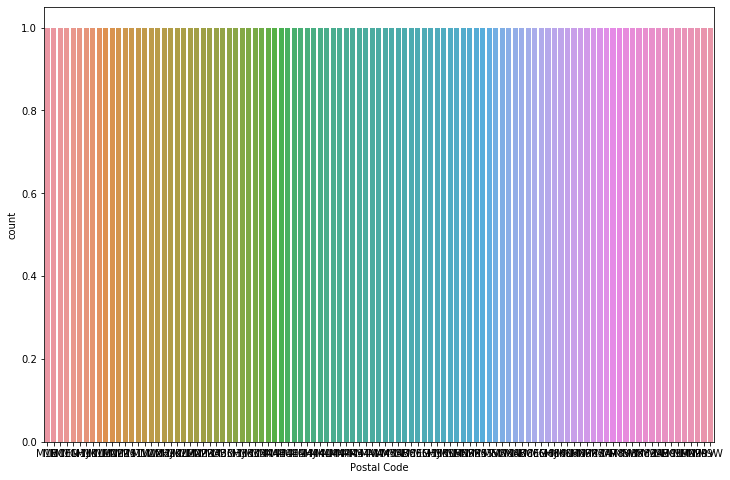

In [10]:
plt.figure(figsize=(12, 8))

sns.countplot('Postal Code', data=df)

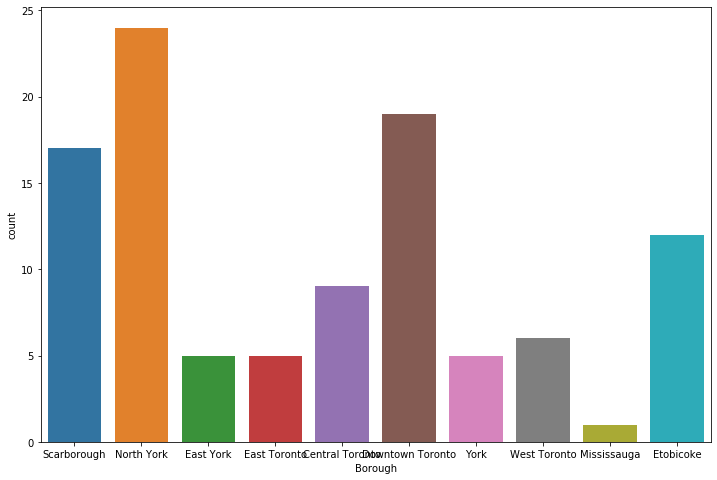

In [11]:
plt.figure(figsize=(12, 8))

sns.countplot('Borough', data=df)

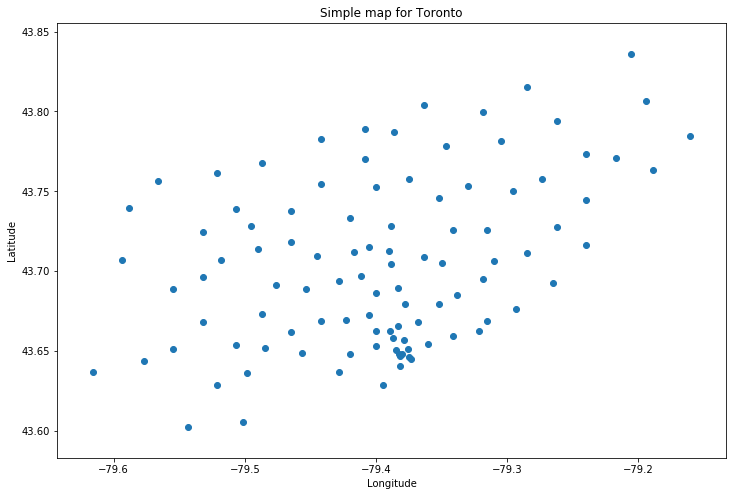

In [12]:
plt.figure(figsize=(12, 8))

plt.scatter(x='Longitude', y='Latitude', data=df)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Simple map for Toronto')

plt.show()

# Question: 3

## I should do some data analysis.
## I want to convert the string data into numerical.
## I will change string data to one hot encoding.

### Dealing with Borough column.

In [13]:
dummies = pd.get_dummies(df['Borough'], drop_first=True)

df2 = pd.concat([df.drop('Borough', axis=1), dummies], axis=1)

df2.head()

,Postal Code,Neighborhood,Latitude,Longitude,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Scarborough,West Toronto,York
0,M1B,"Malvern, Rouge",43.806686,-79.194353,0,0,0,0,0,0,1,0,0
1,M1C,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,0,0,0,0,0,1,0,0
2,M1E,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,0,0,0,0,0,1,0,0
3,M1G,Woburn,43.770992,-79.216917,0,0,0,0,0,0,1,0,0
4,M1H,Cedarbrae,43.773136,-79.239476,0,0,0,0,0,0,1,0,0


### Dealing with Postal Code column.

In [14]:
dummies = pd.get_dummies(df['Postal Code'], drop_first=True)

df2 = pd.concat([df2.drop('Postal Code', axis=1), dummies], axis=1)

df2.head()

,Neighborhood,Latitude,Longitude,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Scarborough,...,M9A,M9B,M9C,M9L,M9M,M9N,M9P,M9R,M9V,M9W
0,"Malvern, Rouge",43.806686,-79.194353,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Woburn,43.770992,-79.216917,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Cedarbrae,43.773136,-79.239476,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### I'll not use the Neighborhood columns so I will drop it 

## Importing KMeans, Creating the model and fitting it.

In [15]:

kclusters = 5  # Set the clusters to 5.

# run k-means clustering
# Creating the model and fitting it.
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(df2.drop('Neighborhood', axis=1))

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Since, I'm working on dataset on Toronto, So I should get the coordinates to be able to generate a map for it.

### Getting the coordinates.

In [16]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


## Creating a new column which have the kmeans labels

In [17]:
df.insert(0, 'Cluster Labels', kmeans.labels_)

In [18]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0,
       3, 3, 3, 3, 3, 1, 1, 0, 0, 3, 4, 4, 4, 1, 0, 0, 4, 4, 4, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

## Here I generate the map.

In [19]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters